# Boom Bikes - Demand prediction

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

----
## Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

----

## Step 1 : Reading and Undestanding Data

### Importing necessary libraries

In [2]:
# To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Libraries to handle dataframes
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100) # To ensure that we are able to view all columns in the notebook

In [4]:
# Libraries for visualization in python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#To store plots within notebook

### Reading and inspecting the dataset

In [5]:
# Reading the dataset. We shall name the dataset provided by BoomBike and "data"
data = pd.read_csv("Boom bikes_data.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
# inpecting the shape
data.shape

(730, 16)

- We have 730 rows and 16 colums

In [103]:
# checking the datatypes of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [104]:
# Checking if there are any null values in the dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [105]:
# checking the basic statistical features of the with integer type columns 
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [106]:
# We shall rename some of the columns so that it is easy to understand

data.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'Demand'}, inplace=True)
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Demand
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
# Indicated in the Data dictionary that the sum of 'Casual' and 'registered' is represented as 'cnt'
# Thus we can keep only 'Demand' as dependant variable for prediction.
# We can drop 'casual' and 'registered'

data.drop(['casual', 'registered'], axis=1, inplace=True)
data.shape

(730, 14)

In [108]:
# 'instant' columns is the numbers of the rows, can be dropped
# 'dteday' is the date in which the data is captured. Since we have the month and year in separate column. We can drop 'dteday'.

data.drop(['instant','dteday'], axis=1, inplace=True)
data.shape

(730, 12)

### Handling Categorical variables

In linear regression modeling, we will be converting categorical variables as Dummy variables.

We can directly use the python function 'pd.get_dummies()' for the conversion. But the function accepts only Object type as input. 

Thus, we have to convert the categorical variable present in the dataset into Object types by assigning the relevant name to the categorical values.

In [109]:
# Assigning names to Season column
data.season.replace((1,2,3,4),('spring', 'summer', 'fall', 'winter'), inplace=True)

In [110]:
# Assigning names to Month column
data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [111]:
# Assigning names to weekday column
data.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [112]:
# Assigning names to Weathersit column
data.weathersit.replace((1,2,3,4),('Clear', 'Mist', 'Light_rain', 'Heavy_rain'), inplace=True)

In [113]:
# Looking at the dataset
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,Demand
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Exploratory Data Analysis of the dataset

### Analysis of numerical variables

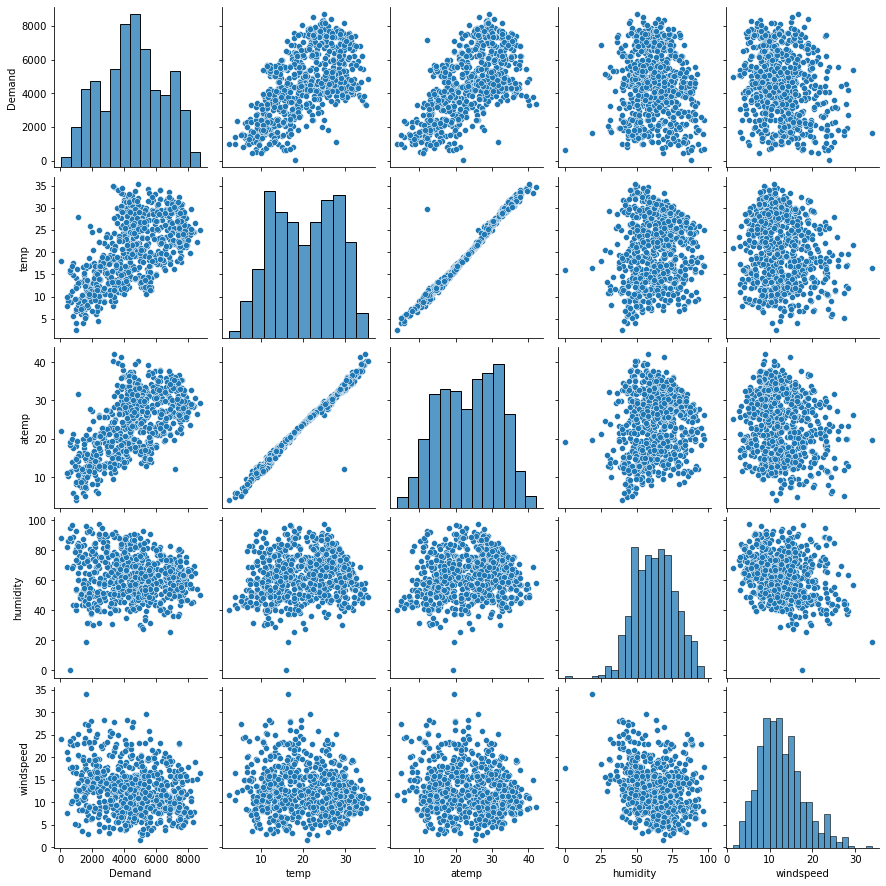

In [114]:
# Plotting a 'pairplot' to visuaize the relation of all the numerical variables

data_num = data[['Demand','temp','atemp','humidity','windspeed']]
sns.pairplot(data_num)
plt.show()

<AxesSubplot:>

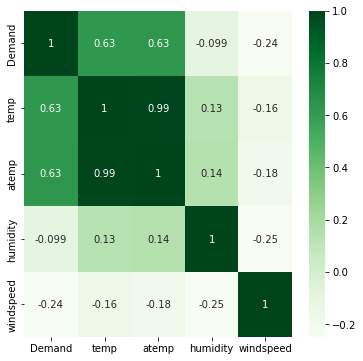

In [115]:
# Creating a heatmap to indicate the correlation among the numercial variables

plt.figure(figsize=(6,6))
sns.heatmap(data_num.corr(), cmap='Greens', annot=True)

Observations -
- Temperature and feeling temperature have almost perfect correation. 
- Demand has strong positive correlation with Temperature. Indicating that as temperature keeps increasing above the freezing winter temperature the demand also increases.
- Demand has some negative correlation with humidity and windspeed, indicating that there is a possible decrease in demand with the increase of humidity and windspeed.

There exists a very high correlation between `temp` and `atemp` (~0.99). `atemp` is what the temperature feels like when interacting with a human body, which is calculated using the recoreded temperature and the relative humidity in the area.

Thus we can drop the variable `atemp` in both train and test datas to avoid multicollinearity in the model

In [116]:
# Dropping 'atemp' dataset

data = data.drop(['atemp'], axis = 1)

### Analysis of Categorical variables

1. Boxplot to visualize the effect of long-term variables such as - year, season, weather situation, on the demand

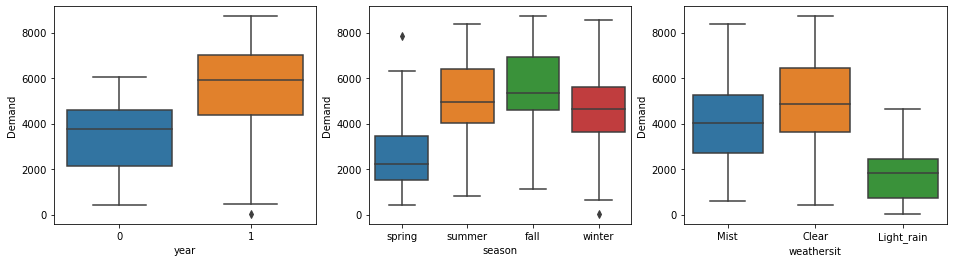

In [117]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(x='year', y='Demand', data = data)
plt.subplot(1,3,2)
sns.boxplot(x='season', y='Demand', data = data)
plt.subplot(1,3,3)
sns.boxplot(x='weathersit', y='Demand', data = data)
plt.show()

2. Boxplot to visualize the effect of variable 'month' on the demand

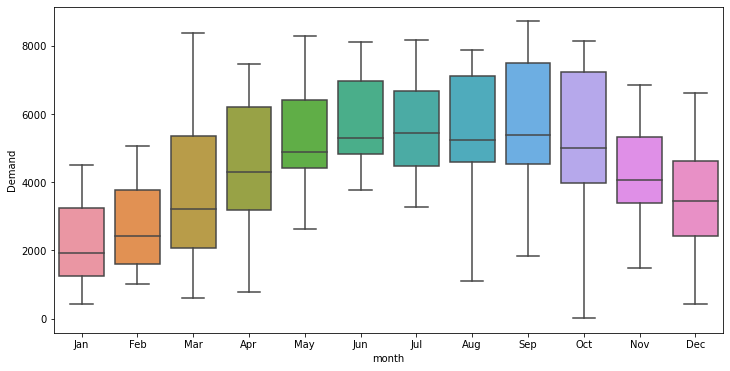

In [118]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='Demand', data = data)
plt.show()

3. Boxplot to visualize the effect of day-to-day variables such as - weekday, workingday, holiday

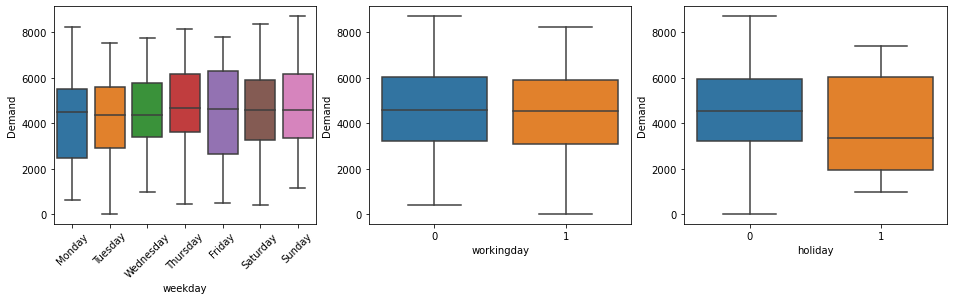

In [119]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(x='weekday', y='Demand', data = data)
plt.xticks(rotation = 45)
plt.subplot(1,3,2)
sns.boxplot(x='workingday', y='Demand', data = data)
plt.subplot(1,3,3)
sns.boxplot(x='holiday', y='Demand', data = data)
plt.show()

## Step 3: Data Preparation

### Creating Dummy variables

We cannot use the cateoricacl variables with string datatype to fit the regression model.
Thus, we covert them into a combination of numerical variables on which the compuatation can be done.

This is done by creating dummy variables with values (combination of 0s & 1s) for each level

In [120]:
# While creating dummy variables, we drop the first column each time to avoid redundancy

# Creating dummies for 'season' and storing dataframe - season
season = pd.get_dummies(data['season'], drop_first = True)   

# Creating dummies for 'weathersit' and storing dataframe - weathersit
weathersit = pd.get_dummies(data['weathersit'], drop_first = True)   

# Creating dummies for 'month' and storing dataframe - month
month = pd.get_dummies(data['month'], drop_first = True)  

# Creating dummies for 'weekday' and storing dataframe - weekday
weekday = pd.get_dummies(data['weekday'], drop_first = True)  

In [121]:
# Merging the created dummy variables into the original dataset

data = pd.concat([data, season, weathersit, month, weekday], axis = 1)

data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Demand,spring,summer,winter,Light_rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
# We can drop the original categorical columns since we have created created variables for each

data.drop(['season', 'weathersit', 'month', 'weekday'], axis = 1, inplace = True)

data.head()

,year,holiday,workingday,temp,humidity,windspeed,Demand,spring,summer,winter,Light_rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
#Checking the shape of dataset
data.shape

(730, 29)

We now have 29 rows representing each of the variables that we are going to study

## Step 4: Splitting the data into training and Testing sets

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(0) # We specify this so that train and test dataset alwys have the same rows
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [125]:
# Checking the shape after splitting the data
print('Shape of train set is', data_train.shape)
print('Shape of test set is',data_test.shape)

Shape of train set is (510, 29)
Shape of test set is (219, 29)


### Rescaing the features of the Train dataset

We see that the numerecial values of `Demand` is much higher than the value of other numberical variables. So we must rescale these variables to have a comparable scale. This will ensure that the units of coefficients obtained in the model will be of comparabe scale.

We shall use MinMax Scaling in this model

In [126]:
# Importing necessary library
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object using MinMax()
scaler = MinMaxScaler()

In [127]:
# Creating a list of column names for numerical variables
num_vars = ['temp', 'humidity', 'windspeed', 'Demand']

# Applying scaler to these columns
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [128]:
data_train.head()

,year,holiday,workingday,temp,humidity,windspeed,Demand,spring,summer,winter,Light_rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [129]:
data_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,Demand,spring,summer,winter,Light_rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We see that the numerical variables have got scaled.

### Heatmap to check the correlation coefficients among the various variables

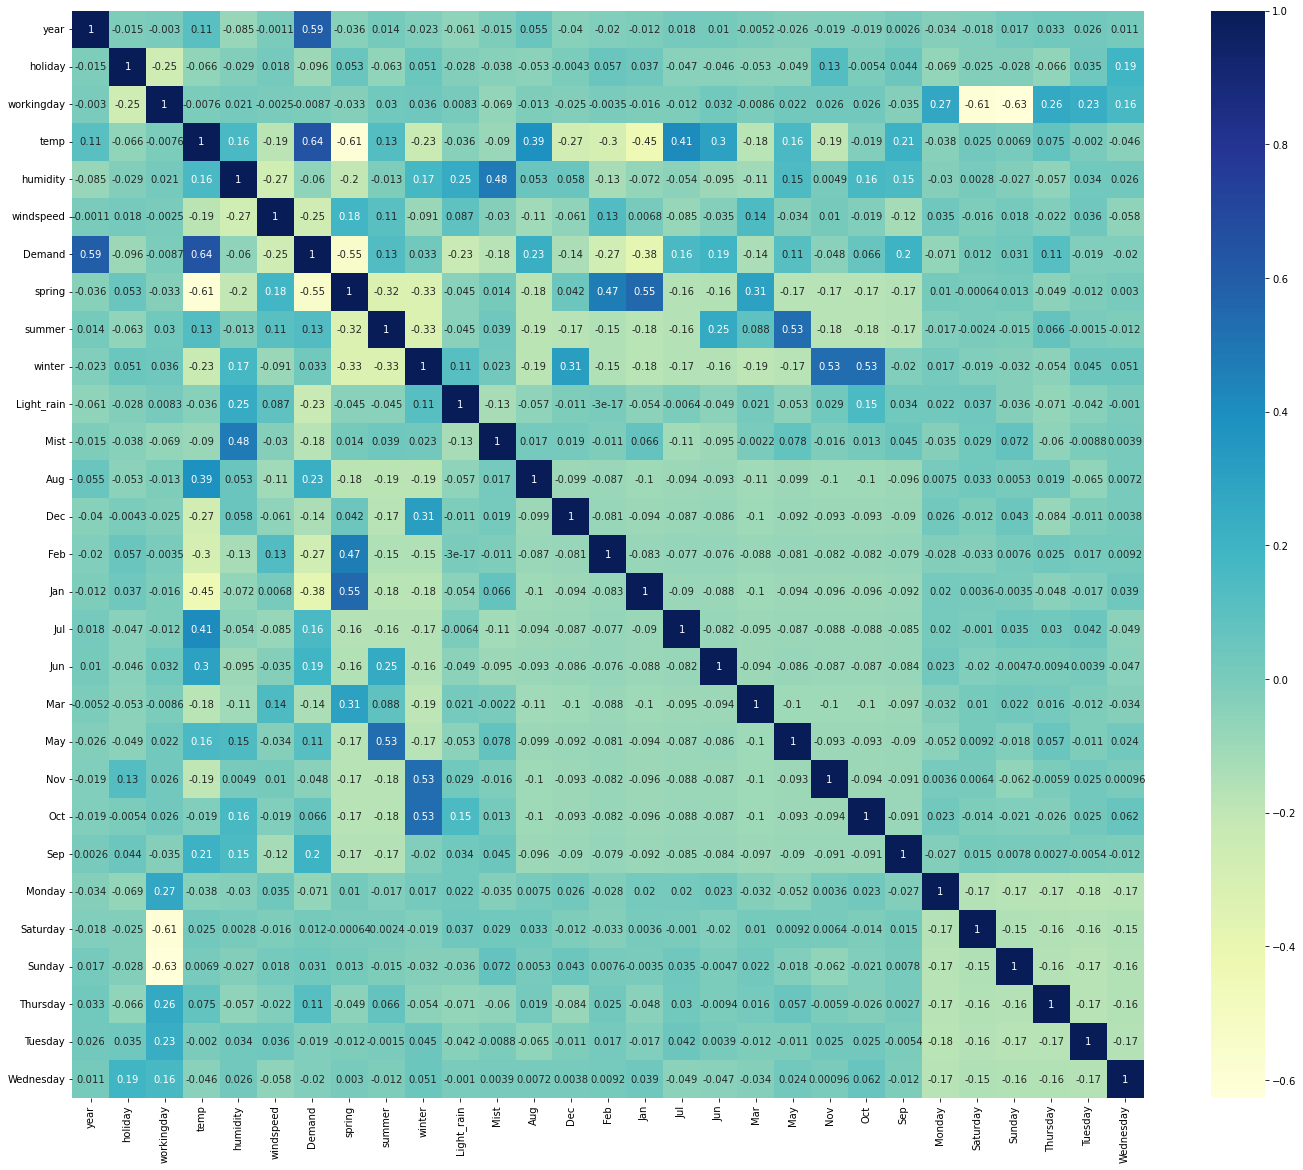

In [130]:
plt.figure(figsize = (24,20))
sns.heatmap(data_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Observation:

- We see that there exists high correlation among few independent variables, such as - 
   - seasons and their corresponding months
   - humidity and weathersit

## Step 5: Building a linear model

In [131]:
# Diving the dataset into X and y sets for model buiding

y_train = data_train.pop('Demand')
X_train = data_train

### RFE - Recursive Feature Elimination 

We shall be using the RFE method in this case, since there are many variables in the beginning. After running RFE to get the first set of variables to start off with, we can then proceed to eiminate variables one by one to reach the most representative model.

We shall be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE

In [132]:
# Importing RFE and linera regression libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [133]:
# Running RFE with output number of variables as 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10)]

In [135]:
# 'True' represented by ref.support_ indicates that the RFE has created the best model with these 15 variables

# We shall store these variables names as list to further use them during Manual model building

RFE_col = X_train.columns[rfe.support_]
RFE_col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Light_rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

## Building model using statsmodel, for detailed statistics

In [136]:
# Creating X_test dataframe with variables selected by RFE
X_train_rfe = X_train[RFE_col]

We fit a regression line through the training data using `statsmodels`.

We must add constant to the dataset, else the model will fit a line passing through the origin

### Model 1

In [137]:
# Importing necessary library
import statsmodels.api as sm

# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

In [138]:
# Creating an object with class OLS for the resgression line
lm1 = sm.OLS(y_train, X_train_lm)

In [139]:
# Fitting the regression line and storing parameters to lr_model
lm_model_1 = lm1.fit()

In [140]:
# Performing summary operation to print all the different parameters of the regression line fitted
print(lm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.34e-189
Time:                        18:31:42   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

### Calcuating VIF - Variance Inflation Factor

We shall be calculating the VIF of variables in each model to understand the multicollinearilty among them

In [141]:
# We shall deine a function so that we can call it everytime we need to calcuate the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_for(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [142]:
# VIF for model 1

VIF_for(X_train_lm)

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,humidity,1.93
14,Nov,1.76
12,Jan,1.68
10,Mist,1.57
11,Dec,1.49


Observation - Model 1
- The R-squared value is obtained as 84.5%. This pretty good to start with. R-squared and Adj.R-squared are comparable
- VIF of all variables other than 'spring' are within acceptable range (<5)
- P value of few variables is high. `Dec` has highest P value of 0.034. We shall drop this variable in the next model


### Model 2

In [143]:
# Dropping the column 'Dec' from the train dataset
X_train_new = X_train_lm.drop(['Dec'], axis = 1)

In [144]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_new)

# Fitting the regression line and storing parameters to lr_model
lm_model_2 = sm.OLS(y_train, X_train_lm).fit()

# Performing summary operation to print all the different parameters of the regression line fitted
print(lm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.25e-189
Time:                        18:31:46   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

In [145]:
# VIF for model 2

VIF_for(X_train_lm)

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.77
7,summer,2.67
4,humidity,1.91
11,Jan,1.57
10,Mist,1.56
12,Jul,1.49
13,Nov,1.48


Observation - Model 2
- The R-squared value is obtained as 84.4%. R-squared and Adj.R-squared are comparable
- VIF of all variables other than 'spring' are within acceptable range (<5)
- P value of few variables is high. `Nov` has highest P value of 0.144. We shall drop this variable in the next model

### Model 3

In [146]:
# Dropping the column 'Nov' from the train dataset
X_train_new = X_train_lm.drop(['Nov'], axis = 1)

In [147]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_new)

# Fitting the regression line and storing parameters to lr_model
lm_model_3 = sm.OLS(y_train, X_train_lm).fit()

# Performing summary operation to print all the different parameters of the regression line fitted
print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.45e-190
Time:                        18:31:50   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

In [148]:
# VIF for model 3

VIF_for(X_train_lm)

,Features,VIF
0,const,76.77
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,humidity,1.91
11,Jan,1.57
10,Mist,1.56
12,Jul,1.49
13,Sep,1.30


Observation - Model 3
- The R-squared value is obtained as 84.3%. R-squared and Adj.R-squared are comparable
- VIF of all variables other than 'spring' are within acceptable range (<5)
- P value of few variables is high. `Jan` has highest P value of 0.061. We shall drop this variable in the next model

### Model 4

In [149]:
# Dropping the column 'Jan' from the train dataset
X_train_new = X_train_lm.drop(['Jan'], axis = 1)

In [150]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_new)

# Fitting the regression line and storing parameters to lr_model
lm_model_4 = sm.OLS(y_train, X_train_lm).fit()

# Performing summary operation to print all the different parameters of the regression line fitted
print(lm_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.69e-190
Time:                        18:31:53   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

In [151]:
# VIF for model 4

VIF_for(X_train_lm)

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,humidity,1.90
10,Mist,1.56
11,Jul,1.48
12,Sep,1.30
9,Light_rain,1.24


Observation - Model 4
- The R-squared value is obtained as 84.2%. R-squared and Adj.R-squared are comparable
- VIF of all variables other than 'spring' are within acceptable range (<5)
- P value of few variables is high. `Spring` has highest P value of 0.007. We shall drop this variable in the next model

### Model 5

In [152]:
# Dropping the column 'Spring' from the train dataset
X_train_new = X_train_lm.drop(['spring'], axis = 1)

In [153]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_new)

# Fitting the regression line and storing parameters to lr_model
lm_model_5 = sm.OLS(y_train, X_train_lm).fit()

# Performing summary operation to print all the different parameters of the regression line fitted
print(lm_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.89e-190
Time:                        18:31:56   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.368      0.0

In [154]:
# VIF for model 5

VIF_for(X_train_lm)

,Features,VIF
0,const,44.99
4,humidity,1.87
3,temp,1.60
9,Mist,1.55
10,Jul,1.43
6,summer,1.33
7,winter,1.29
8,Light_rain,1.24
11,Sep,1.19
5,windspeed,1.18


Observation - Model 5
- The R-squared value is obtained as 84.0%. R-squared and Adj.R-squared are comparable
- VIF of all variables are within acceptable range of < 5.
- P value of all the variables is within the acceptable range of < 0.05

We can consider this as the final model and go ahead to make predictions. We can return back to further iterate this model if the test data results are not satisfsctory

### F-statistic of the model

F-statistic : 237.6
Probability(F-statistic) : ~0.0000 (approximately zero)

A high F-statistic value and a very low Probability value indicate that the model is significant.

## Step 6: Residual Analysis and Model Validation

One of the major assumptions of linear regression is that the error terms are normally distributed. We validate if this assumption holds good for the developed model using a histogram to plot the error terms

In [155]:
# Prediting the y values of the train data using the Model 5
y_train_pred = lm_model_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

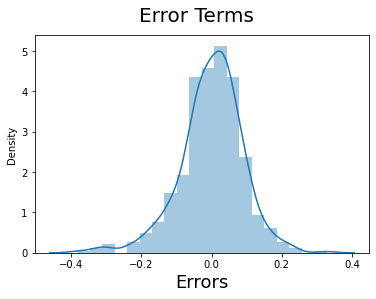

In [156]:
# Plotting a histogram to visuaize the distribution of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

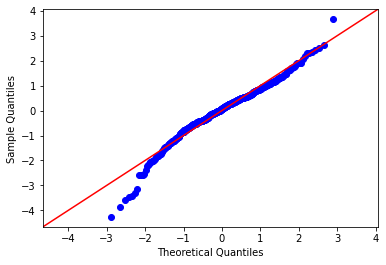

In [157]:
# Plotting a Q-Q plot to verify the distribution type of error terms
import scipy.stats as stats # importing library to use a theoretical normal distribution

sm.qqplot((y_train - y_train_pred), fit=True, line='45', dist = stats.norm)
plt.show()

We observe through the histogram that the distribution of error terms is normally distributed.

The Q-Q plot also indicates that the error terms are normally distributed

**Thus, the assuption of linear regression holds good.**

### Homoscedasticity and Independence of error terms

**Scatter plot for Residuals versus Fits**

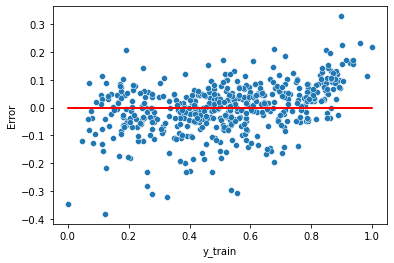

In [158]:
error = y_train - y_train_pred                # calcuating the error
sns.scatterplot(y_train, error)               # plot of errors
plt.plot(y_train, (y_train - y_train), 'r')   # The mean error line
plt.xlabel('y_train')
plt.ylabel('Error')
plt.show()

**Independence of errors** - The residuals seem to be randomly scattered and thus there is no relationship


**Equal Variances** - There is no pattern in the distibution of the residuals, thus they have constant variance

### Checking Multicollinearilty among the independent variables

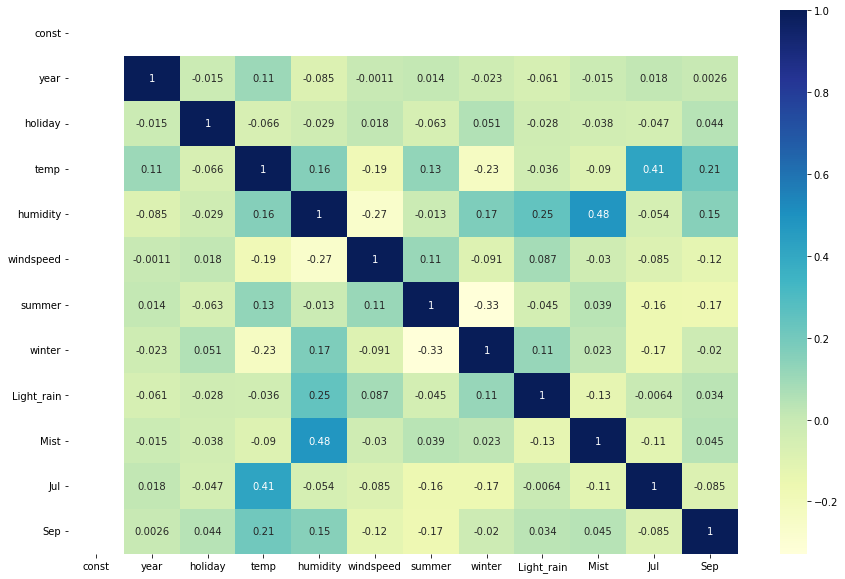

In [159]:
# Plotting a heatmap for the independent variables that are present in X_train_new

plt.figure(figsize = (15,10))
sns.heatmap(X_train_new.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

The multicolinearity among variables is not very significant

## Step 7: Making predictions using the final model

**Scaling the numerical data in the test set before proceeding with prediction**

In [160]:
# Using the same list that was created for train data for numerical variables
num_vars = ['temp', 'humidity', 'windspeed', 'Demand']

# Applying scaler to these columns
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [161]:
data_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,Demand,spring,summer,winter,Light_rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing test set into X and y

In [162]:
y_test = data_test.pop('Demand')
X_test = data_test

In [163]:
# We shall store the names of the independent variables from Model 5 as a list.
# So that we can use the same independent variables in the X_test dataset

X_train_lm_without_column = X_train_lm.drop(['const'], axis = 1) # getting a dataframe without constant

col_model = X_train_lm_without_column.columns

In [164]:
# Genrating X_test with only the columns that are the independent variables in Model 5

X_test = X_test[col_model]

In [165]:
# Adding a constant
X_test_m5 = sm.add_constant(X_test)

X_test_m5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   year        219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   temp        219 non-null    float64
 4   humidity    219 non-null    float64
 5   windspeed   219 non-null    float64
 6   summer      219 non-null    uint8  
 7   winter      219 non-null    uint8  
 8   Light_rain  219 non-null    uint8  
 9   Mist        219 non-null    uint8  
 10  Jul         219 non-null    uint8  
 11  Sep         219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [166]:
# Making presictions on X_test_m5 using model Model 5

y_pred = lm_model_5.predict(X_test_m5)

# 'Y_pred' is the predicted Demand using Model 5 against the X_test_m5

## Step 8: Model Evaluation

We shall plot the graph for actual versus predicted values of the y_test

Text(0, 0.5, 'y_pred')

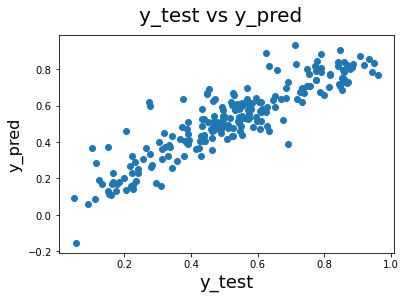

In [167]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                     # Y-label

### R-squared score for the test data

In [168]:
from sklearn.metrics import r2_score # Library for r2_score from Scikitlearn
r2 = r2_score(y_test, y_pred)
r2.round(4)

0.8044

The R-squared value of the test data is : **80.44%**

### Adjuested R-squared for the test data

In [169]:
# n represents the number of rows in the test dataset
n = X_test_m5.shape[0]

# P represents the number of predictors i.e. the number of independent variables incuding the constant
p = X_test_m5.shape[1]

# Using the adjuested R-squared formula

adjusted_r2 = 1- ((1-r2)*(n-1)/(n-p-1))
adjusted_r2.round(4)

0.793

The Adjuested R-squared value of the test data is : **79.30%**

### Comparision of R-squared statistics of the train and test datasets

Train Dataset:
- R-squared           : **84.0%**
- Adjuested R-squared : **83.6%**

Test Dataset:
- R-squared           : **80.44%**
- Adjuested R-squared : **79.30%**

Observations:
- R-squared values of the Train and test datasets are comparable
- R2 and Adj.R2 are each of the Test and train dataset are very close 

Thus we can concude that the Model 5 generated is **Good Fit**

### RMSE - Root Mean Squared Error of the Model

In [170]:
# SciKitlearn library to calculate MSE
from sklearn.metrics import mean_squared_error  

# Calculating RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE.round(4)

0.0964

### MSE - Mean Squared Error of the Model

In [171]:
# Calculating MSE
MSE = mean_squared_error(y_test, y_pred)
MSE.round(4)

0.0093

### MAE - Mean asbsolute error

In [172]:
# SciKitlearn library to calculate MAE
from sklearn.metrics import mean_absolute_error  

# Calculating RMSE
MAE = mean_absolute_error(y_test, y_pred)
MAE.round(4)

0.0716

## Step 9: Interpretation of the Best Fitted Model

The obtained equation of the best fitted line is:

$ Demand = 0.2257 + (0.2279  \times  year) - (0.0994  \times  holiday)+ (0.5978 \times temp) - (0.1825 \times humidity) - (0.1892 \times windspeed) + (0.0803 \times summer) + (0.1357 \times winter) - (0.2331 \times Lightrain) - (0.0517 \times Mist) - (0.0481 \times Jul) + (0.0959 \times Sep) $

### Interpretation of the coefficients

**Below interpretation of each variable holds goo when all the other variables are treated to be constant**

- **Constant**: Indicates that in the absence of any of the independent variables, still the demand can increase by 0.2257 units  


- **year**: Indicates that with unit increase in year the demand increases by 0.2279 units


- **holiday**: Indicates that on the day of hoiday the demand decreases by 0.0994 units


- **temp**: Indicates that with unit increase in temperature the demand increases by 0.5978 units


- **humidity**: Indicates that with unit increase in humidity the demand decreases by 0.1825 units


- **windspeed**: Indicates that with unit increase in humidity the demand decreases by 0.1892 units


- **summer**: Indicates that during the summer season the demand increases by 0.0803 units


- **winter**: Indicates that during the summer season the demand increases by 0.1357 units


- **Light_rain**: Indicates that if the weather situation is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, the demand decreases by 0.2331 units


- **Mist**: Indicates that if the weather situation is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, the demand decreases by 0.0517 units


- **Jul**: Indicates that during the month of July the demand decreases by 0.0481 units


- **Sep**: Indicates that during the month of September the demand increases by 0.0959 units

### Features contributing significnatly towards explaining the Demand of Shared Bikes

From the best fitted model we can conclude that below variables are higly influencial in explaining the demand

1. **Temperature**: Increase in temperature significantly increases the Demand. In countries such as the US where the temperatures fall really low during winter, with increase in temperatures and comfortable environment more people prefer to drive the shared bikes


2. **Year**: This variable indicates that the Demand increased in the year 2019 compared to 2018.


3. **Light_rain** - This variable indicates that during Weathersit condition 3 i.e., during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, there is a significant decrease in Demand


4. **Humidity and Windspeed** - This indicates that with increase in humidity and the windspeed the Demand significantly decreases.